# Answering Business Questions Using SQL

In this project we will use SQL to answer some typical business questions using the Chinook database. The database is provided as a SQLite database file called chinook.db and can be downloaded here.

A copy of the schema can be seen below:

## Importing Libraries and Creating Helper Functions

In [1]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
%matplotlib inline

db = 'chinook.db'

### Takes SQL query as an argument and returns a pandas dataframe of the query.
def run_query(q):
    with sqlite3.connect(db) as conn:
        return pd.read_sql(q, conn)

### Takes a SQL command as an argument and executes it using the sqlite module.    
def run_command(c):
    with sqlite3.connect(db) as conn:
        conn.isolation_level = None
        conn.execute(c)

### Calls the run_query() function to return a list of all tables and views in the database       
def show_tables():
    q = """
    SELECT
        name,
        type
    FROM sqlite_master
    WHERE type IN ("table","view");
    """
    return run_query(q)

show_tables()

,name,type
0,album,table
1,artist,table
2,customer,table
3,employee,table
4,genre,table
5,invoice,table
6,invoice_line,table
7,media_type,table
8,playlist,table
9,playlist_track,table


Write a query that returns each genre, with the number of tracks sold in the USA:
in absolute numbers
in percentages.

Create a plot to show this data.

Write a paragraph that interprets the data and makes a recommendation for the three artists whose albums we should purchase for the store, based on sales of tracks from their genres.

The company is interested in finding out which genres sell the best in the USA so we can select which albums to purchase. 

## Selecting New Albums to Purchase

In [18]:
albums_to_purchase = '''
WITH usa_tracks_sold AS
    (
    SELECT il.* FROM invoice_line il
    INNER JOIN invoice i ON il.invoice_id = i.invoice_id
    INNER JOIN customer c ON i.customer_id = c.customer_id
    WHERE c.country = "USA"
    )
    
SELECT
    g.name genre,
    COUNT(uts.invoice_line_id) tracks_sold,
    ROUND(CAST(COUNT(uts.invoice_line_id) AS FLOAT) / (
        SELECT COUNT(*)
        FROM usa_tracks_sold
        ), 2) percentage_sold
FROM usa_tracks_sold uts
INNER JOIN track t ON t.track_id = uts.track_id
INNER JOIN genre g ON g.genre_id = t.genre_id
GROUP BY 1
ORDER BY 2 DESC
LIMIT 10;
'''

run_query(albums_to_purchase)

,genre,tracks_sold,percentage_sold
0,Rock,561,0.53
1,Alternative & Punk,130,0.12
2,Metal,124,0.12
3,R&B/Soul,53,0.05
4,Blues,36,0.03
5,Alternative,35,0.03
6,Latin,22,0.02
7,Pop,22,0.02
8,Hip Hop/Rap,20,0.02
9,Jazz,14,0.01


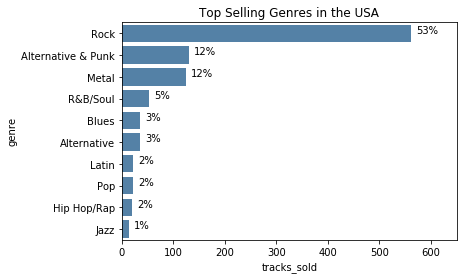

In [19]:
genre_sales_usa = run_query(albums_to_purchase)

ax = sns.barplot(x = genre_sales_usa["tracks_sold"], y = genre_sales_usa["genre"], color='steelblue')

ax.set(title="Top Selling Genres in the USA", xlim=(0, 650))

for i, label in enumerate(list(genre_sales_usa.index)):
    score = genre_sales_usa.loc[label, "tracks_sold"]
    label = (genre_sales_usa.loc[label, "percentage_sold"] * 100
            ).astype(int).astype(str) + "%"
    plt.annotate(str(label), (score + 10, i - .015))

plt.show()

"Based on the sales of tracks across different genres in the USA, we should purchase the new albums by the following artists:

Red Tone (Punk)
Slim Jim Bites (Blues)
Meteor and the Girls (Pop)
It's worth keeping in mind that combined, these three genres only make up only 17% of total sales, so we should be on the lookout for artists and albums from the 'rock' genre, which accounts for 53% of sales."

Write a paragraph that interprets the data and makes a recommendation for the three artists whose albums we should purchase for the store, based on sales of tracks from their genres.

In [20]:
Each customer for the Chinook store gets assigned to a sales support agent within the company when they first make a purchase. You have been asked to analyze the purchases of customers belonging to each employee to see if any sales support agent is performing either better or worse than the others.

You might like to consider whether any extra columns from the employee table explain any variance you see, or whether the variance might instead be indicative of employee performance.

Instructions

Write a query that finds the total dollar amount of sales assigned to each sales support agent within the company. Add any extra attributes for that employee that you find are relevant to the analysis.
Create a plot of the results of your query.
Write a short statement describing your results, and providing a possible interpretation.

SyntaxError: invalid syntax (<ipython-input-20-360c52a26d7c>, line 1)